# Biclustering

Table of contents
1. [Spectral Biclustering algorithm](#spectral-biclustering-algorithm)

<a name='spectral-biclustering-algorithm'></a>
## Spectral Biclustering algorithm

The spectral biclustering algorithm is specifically designed to cluster data by simultaneously considering both the rows (samples) and columns (features) of a matrix. It aims to identify patterns not only between samples but also within subsets of samples, allowing for the detection of localized structure within the data. This makes spectral biclustering particularly well-suited for datasets where the order or arrangement of features is fixed, such as in images, time series, or genomes.



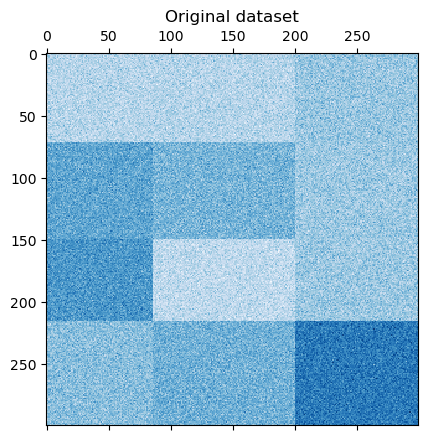

In [4]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
_ = plt.show()

In [6]:
import numpy as np

# Creating lists of shuffled row and column indices
rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

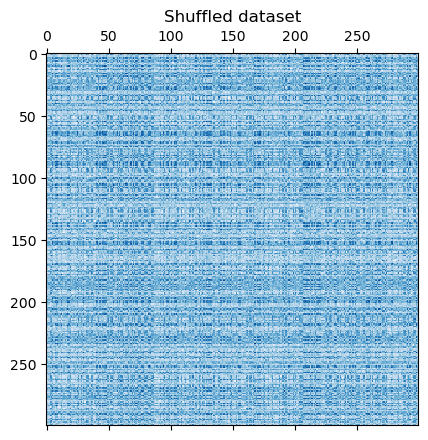

In [7]:
data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
_ = plt.show()

In [ ]:
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(
    model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

In [13]:
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(
    model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

consensus score: 1.0


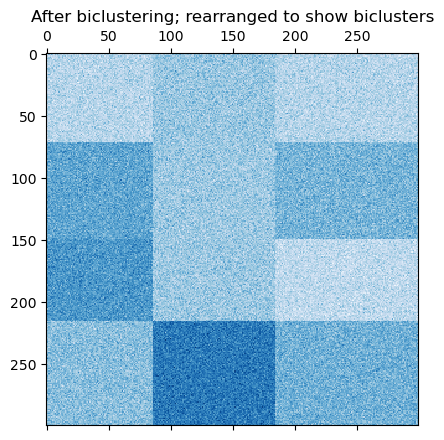

In [16]:
# Reordering first the rows and then the columns.
reordered_rows = data[np.argsort(model.row_labels_)]
reordered_data = reordered_rows[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
_ = plt.show()

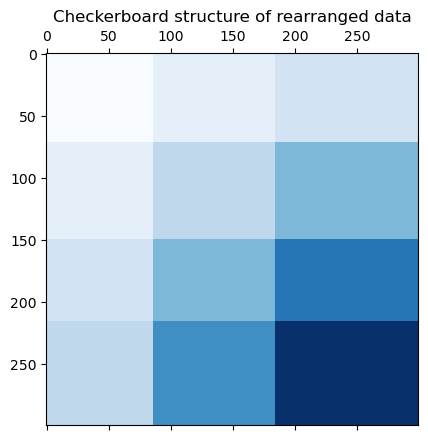

In [17]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()